In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv("UScomments.csv", error_bad_lines=False)
videos = pd.read_csv("USvideos.csv", error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [3]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [4]:
df.head()

,Unnamed: 0,video_id,comment_text,likes,replies
0,0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,4,XpVt6Z1Gjjo,trending 😉,3,0


In [5]:
df.columns

Index(['Unnamed: 0', 'video_id', 'comment_text', 'likes', 'replies'], dtype='object')

In [6]:
df.set_index('Unnamed: 0', inplace=True)

In [7]:
df.head()

,video_id,comment_text,likes,replies
Unnamed: 0,,,,
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [8]:
df.rename(columns={0 :'index'}, inplace=True)

In [9]:
df.head()

,video_id,comment_text,likes,replies
Unnamed: 0,,,,
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   video_id      2000 non-null   object
 1   comment_text  2000 non-null   object
 2   likes         2000 non-null   int64 
 3   replies       2000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 78.1+ KB


In [11]:
#Sentimental Analysis

In [12]:
!pip install textblob

In [13]:
from textblob import TextBlob

In [14]:
TextBlob('trending 😉').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [15]:
TextBlob('trending 😉').sentiment.polarity

0.0

In [16]:
pd.set_option('max_colwidth',0)
df['comment_text']

Unnamed: 0
0       Logan Paul it's yo big day ‼️‼️‼️                                                                                                                           
1       I've been following you from the start of your vine channel and have seen all 365 vlogs                                                                     
2       Say hi to Kong and maverick for me                                                                                                                          
3       MY FAN . attendance                                                                                                                                         
4       trending 😉                                                                                                                                                  
           ...                                                                                                                                                      

In [17]:
TextBlob("I got hit by Hurricane Irma too, but it wasn't as bad as this.\nI am so sorry for all the Cubans.\nPrayers to all, including the ones who didn't make it. 😞💕").sentiment

Sentiment(polarity=-0.5999999999999999, subjectivity=0.8333333333333333)

In [18]:
df = df.iloc[0:2000,:]
polarity=[]
for i in df['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [19]:
df

,video_id,comment_text,likes,replies
Unnamed: 0,,,,
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your vine channel and have seen all 365 vlogs,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
1995,-Ifnaxi2LQg,¿Soy La Unica Que Habla Español? 😞🌴,2,0
1996,-Ifnaxi2LQg,"Fergie e Nicki, a melhor dupla que você respeita💜💜💜💜😍😍😍😍😍❤️❤️❤️❤️❤️",0,0
1997,-Ifnaxi2LQg,"Fazer uma participação pequena na música de Ariana Grande tudo bem agora na música da Fergie, eu quero minha Nicki de volta.",0,0


In [20]:
df['polarity'] = polarity

In [21]:
df

,video_id,comment_text,likes,replies,polarity
Unnamed: 0,,,,,
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your vine channel and have seen all 365 vlogs,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
...,...,...,...,...,...
1995,-Ifnaxi2LQg,¿Soy La Unica Que Habla Español? 😞🌴,2,0,0.000000
1996,-Ifnaxi2LQg,"Fergie e Nicki, a melhor dupla que você respeita💜💜💜💜😍😍😍😍😍❤️❤️❤️❤️❤️",0,0,0.000000
1997,-Ifnaxi2LQg,"Fazer uma participação pequena na música de Ariana Grande tudo bem agora na música da Fergie, eu quero minha Nicki de volta.",0,0,0.000000


In [22]:
df.nunique()

video_id        21  
comment_text    1966
likes           14  
replies         7   
polarity        413 
dtype: int64

In [23]:
#positive comments
comments_positive = df[df['polarity']==1]

In [24]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
Unnamed: 0,,,,,
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep caring for yourself and others as best as you can. This is life.,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell my kidney so I can afford iPhone X :D,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [25]:
#Negative comments
comments_negative = df[df['polarity']==-1]

In [26]:
comments_negative.head()

,video_id,comment_text,likes,replies,polarity
Unnamed: 0,,,,,
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!!,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved how truly insane he is…,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [28]:
total_comments = (' '.join(comments_positive['comment_text']))

(-0.5, 999.5, 499.5, -0.5)

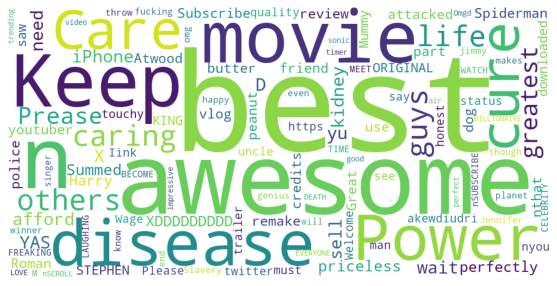

In [29]:
wordcloud = WordCloud(width=1000, height=500, stopwords=set(STOPWORDS),background_color='white').generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [30]:
total_comments2 = (' '.join(comments_negative['comment_text']))

(-0.5, 999.5, 499.5, -0.5)

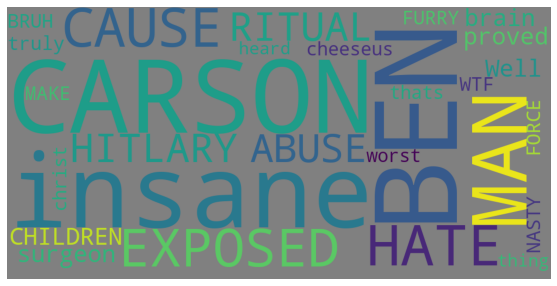

In [31]:
wordcloud = WordCloud(width=1000, height=500, stopwords=set(STOPWORDS), background_color='gray').generate(total_comments2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

#### trending tags on youtube

In [32]:
tags_complete = (' '.join(videos['tags']))

In [33]:
import re
tags = re.sub('[^a-zA-Z]', ' ', tags_complete)

In [34]:
tags = re.sub(' +',' ',tags)

In [35]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster A

(-0.5, 999.5, 499.5, -0.5)

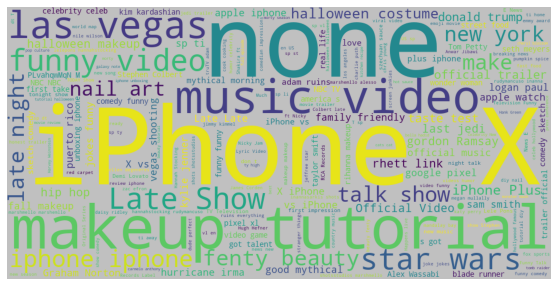

In [36]:
wordcloud = WordCloud(width=1000, height=500, stopwords=set(STOPWORDS), background_color='silver').generate(tags)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Text(0.5, 1.0, 'Regression plot for dislikes and views')

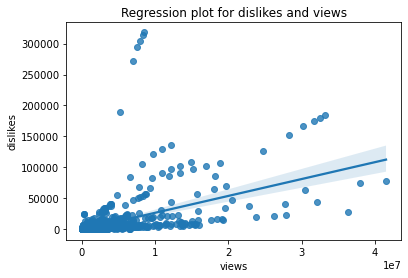

In [37]:
import seaborn as sns
sns.regplot(data=videos, x='views', y='dislikes')
plt.title('Regression plot for dislikes and views')

Text(0.5, 1.0, 'Regression plot for likes and views')

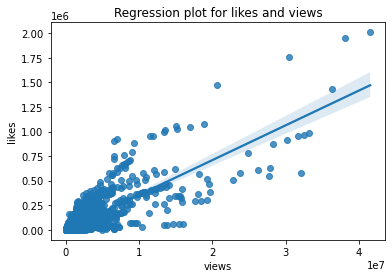

In [38]:
sns.regplot(data=videos, x='views', y='likes')
plt.title("Regression plot for likes and views")

In [39]:
df.head()

,video_id,comment_text,likes,replies,polarity
Unnamed: 0,,,,,
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your vine channel and have seen all 365 vlogs,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [40]:
#!pip uninstall emoji

In [41]:
#!pip install emoji

In [42]:
import emoji

In [43]:
df['comment_text'].dropna(inplace=True)

In [44]:
len(df)

2000

In [45]:
comment = 'trending 😉'

In [47]:
[c for c in comment if c in emoji.EMOJI_DATA]

['😉']

In [49]:
comment='trending 😉'
[c for c in comment if c in emoji.EMOJI_DATA]

['😉']

In [50]:
str=''
for i in df['comment_text']:
    list=[c for c in i if c in emoji.EMOJI_DATA]
    for ele in list:
        str = str+ele

In [51]:
str

'‼‼‼😉😭👍🏻❤😍💋💙👍👈😂🔥😂😂😂😂👻❤😂❤💎😆😆😆😆😆😆😁😁😁😁😁😁😁😂😂😂😂😭😒👏👏👏👏👏👏👏👏👏👏😊❤👈😂😂👌👌🤔👈😂😂😁💔😂👎👎👎👎👎🍎😤😂😂😂😂👈😭😭😭😢😢😢😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂💋💋👫💘😻💋💋💖💖💖💖💖💖💖💖💖💖💖💖💖💖🌟🌟😮😮😮😮😮😮😮😮😮👈😊👇🏻😳😳❤👈😠😆😂😆😂😆😊😠😴😴😴😴👈🤔😂😝😂😂😂👍😂™👈☺😔😩😩😡😍😍😍😍😍😍😂🙏🏻😄☺😬😊👍🏻😊☹🤷🤣🤣🤣🤣😃😃😃😃👌🏽🍏🍎😓😂😂🤣🤣❤❤😂🤦🏽♀😞😂🙏🏼😂😂😂✌😂😂😂😂😂😂😂😂😂😂😊😂😂😂😂😂😂😔😂😂😂😂😭😭😭😭💀😂😂👀😂😂😂😱❤😂😂😂😂😂😂😂😂😂❤❤👑👑👑😂😂😍😍😍🌮🌮🌮🌮🌮😂😀😂😂😂😂😂😂😂💆🏿♂🔥👏👏👏😊😅😆😆😆😆😂😂😂😂😂😂🌟🌟😮😮😮😮😮😮😮😮😮😂😂😂😂❤❤❤🐂💩💕😉😍😍😍😍❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤💓💓💓💓💓💓💓❤❤❤❤❤❤❤❤❤💗💗😢💝💝❤💙😭❤🙏❤😍😍😍😍😍💜💜💜😎😂❤😊😒😱👏👏👏😎😱😱😱😱🎉🤔😂😂😂😂😋😋😍😍😍😘😱😳😘😘😍😍😐😉😍😊😕😄😞🔥🔥🔥🔥🔥🤘🏻😱😱😂😊😭😂😂😍👍😆🙌🙌🙌🌟🌟😮😮😮😮😮😮😮😮😮👍🏼💕😀😂😂😂😂😂😂😂😊😂😂😂😂😏😏😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😊😂😂😍💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😞💕'

In [52]:
print(str)

‼‼‼😉😭👍🏻❤😍💋💙👍👈😂🔥😂😂😂😂👻❤😂❤💎😆😆😆😆😆😆😁😁😁😁😁😁😁😂😂😂😂😭😒👏👏👏👏👏👏👏👏👏👏😊❤👈😂😂👌👌🤔👈😂😂😁💔😂👎👎👎👎👎🍎😤😂😂😂😂👈😭😭😭😢😢😢😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂💋💋👫💘😻💋💋💖💖💖💖💖💖💖💖💖💖💖💖💖💖🌟🌟😮😮😮😮😮😮😮😮😮👈😊👇🏻😳😳❤👈😠😆😂😆😂😆😊😠😴😴😴😴👈🤔😂😝😂😂😂👍😂™👈☺😔😩😩😡😍😍😍😍😍😍😂🙏🏻😄☺😬😊👍🏻😊☹🤷🤣🤣🤣🤣😃😃😃😃👌🏽🍏🍎😓😂😂🤣🤣❤❤😂🤦🏽♀😞😂🙏🏼😂😂😂✌😂😂😂😂😂😂😂😂😂😂😊😂😂😂😂😂😂😔😂😂😂😂😭😭😭😭💀😂😂👀😂😂😂😱❤😂😂😂😂😂😂😂😂😂❤❤👑👑👑😂😂😍😍😍🌮🌮🌮🌮🌮😂😀😂😂😂😂😂😂😂💆🏿♂🔥👏👏👏😊😅😆😆😆😆😂😂😂😂😂😂🌟🌟😮😮😮😮😮😮😮😮😮😂😂😂😂❤❤❤🐂💩💕😉😍😍😍😍❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤💓💓💓💓💓💓💓❤❤❤❤❤❤❤❤❤💗💗😢💝💝❤💙😭❤🙏❤😍😍😍😍😍💜💜💜😎😂❤😊😒😱👏👏👏😎😱😱😱😱🎉🤔😂😂😂😂😋😋😍😍😍😘😱😳😘😘😍😍😐😉😍😊😕😄😞🔥🔥🔥🔥🔥🤘🏻😱😱😂😊😭😂😂😍👍😆🙌🙌🙌🌟🌟😮😮😮😮😮😮😮😮😮👍🏼💕😀😂😂😂😂😂😂😂😊😂😂😂😂😏😏😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😊😂😂😍💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😞💕


In [53]:
freq = {i: str.count(i) for i in set(str)}

In [54]:
freq

{'😴': 4,
 '🌮': 5,
 '😏': 2,
 '💎': 1,
 '👈': 8,
 '♀': 1,
 '👀': 2,
 '😂': 184,
 '🌳': 1,
 '💖': 15,
 '🏿': 1,
 '😮': 27,
 '🔥': 21,
 '😄': 2,
 '🤷': 1,
 '💔': 2,
 '🌟': 6,
 '😭': 11,
 '🎉': 1,
 '😬': 1,
 '💋': 9,
 '👅': 1,
 '💙': 2,
 '😻': 2,
 '😑': 1,
 '™': 1,
 '😛': 1,
 '😉': 3,
 '😱': 9,
 '👻': 1,
 '😊': 14,
 '😍': 35,
 '🍎': 2,
 '🌴': 1,
 '✌': 1,
 '👇': 1,
 '😓': 1,
 '💜': 7,
 '💘': 2,
 '😠': 2,
 '😃': 4,
 '🌽': 1,
 '😕': 2,
 '🙌': 3,
 '😁': 8,
 '‼': 3,
 '🎃': 1,
 '😐': 2,
 '🐂': 1,
 '😢': 5,
 '💓': 7,
 '👎': 5,
 '💦': 1,
 '👏': 17,
 '🤘': 1,
 '💩': 1,
 '😋': 3,
 '😘': 3,
 '🚂': 1,
 '😆': 14,
 '😳': 3,
 '💝': 2,
 '😤': 1,
 '🏻': 7,
 '🚣': 1,
 '☺': 2,
 '😩': 3,
 '☹': 1,
 '🏼': 2,
 '😡': 1,
 '😀': 2,
 '🤣': 7,
 '💆': 1,
 '🙏': 3,
 '😞': 4,
 '👍': 6,
 '♂': 1,
 '😎': 2,
 '🤦': 1,
 '🤔': 3,
 '👌': 5,
 '❤': 55,
 '💀': 1,
 '😝': 1,
 '💗': 2,
 '😅': 2,
 '🍏': 1,
 '👫': 2,
 '😔': 2,
 '✨': 1,
 '💕': 4,
 '🏽': 2,
 '👑': 4,
 '😒': 2}

In [55]:
keys = [*freq.keys()]
values = [*freq.values()]

In [56]:
dfe = pd.DataFrame({'chars':keys[:], 'num':values[:]})

In [57]:
dfe

,chars,num
0,😴,4
1,🌮,5
2,😏,2
3,💎,1
4,👈,8
...,...,...
89,✨,1
90,💕,4
91,🏽,2
92,👑,4


In [58]:
df = df.to_csv('analyseSet.csv')